C:\Users\lauri.lode\Documents\2018period1\IntroDS\week3


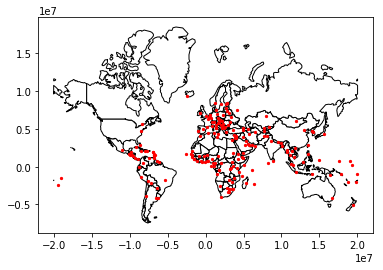

In [4]:
#%%
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import imageio

print(os.getcwd())
filepath = os.getcwd() +'\\'

world = gpd.read_file(filepath+'world\\world_m.shp')
cities = gpd.read_file(filepath+'cities\\cities.shp')
cities = cities.to_crs(world.crs)
base = world.plot(color='white', edgecolor='black')
cities.plot(ax=base, marker='o', color='red', markersize=5)

(816, 1024)
(816,)
Accuracy of logistic regression classifier on test set: 0.88
Accuracy of naive guesses on the test set:  0.09313725490196079
[[15  1  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  1]
 [ 0  1 25  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  1  0  0  0  1]
 [ 0  0  0  0 12  0  0  0  0  0]
 [ 1  0  0  0  0 13  2  0  0  1]
 [ 1  0  0  0  0  1 14  0  1  0]
 [ 0  0  0  0  0  0  0 16  0  0]
 [ 0  1  1  1  0  2  1  0 18  0]
 [ 0  1  1  3  0  1  0  0  0 18]]
[10, 11, 12, 20, 28, 36, 46, 47, 48, 59, 64, 69, 70, 75, 83, 88, 100, 102, 104, 115, 124, 151, 173, 183]


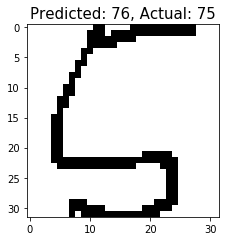

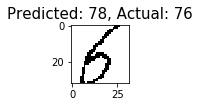

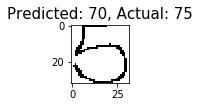

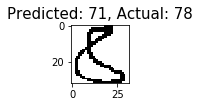

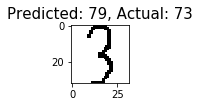

In [6]:
#%%
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import imageio
import numpy.random as npr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from collections import Counter
import scipy
import matplotlib.pyplot as plt

npr.seed(3456456)

filepath = os.getcwd() + "\\HASYv2\\"

hasy_full = pd.read_csv(filepath+'hasy-data-labels.csv')
hasy = hasy_full.query('70<=symbol_id<=80')

#print(hasy.head(10))

pics = []

for pic in hasy.path:
    #print(pic.replace('/','\\'))
   pics.append(imageio.imread(filepath+pic.replace('/', '\\')))

labels = hasy.symbol_id

pics = np.asarray(pics)
pics2 = pics[:,:,:,0].reshape(len(pics), 32*32)
labels = np.asarray(labels)
#print(labels)

pics2_train, pics2_test, labels_train, labels_test = train_test_split(pics2, labels, test_size=0.2, random_state=0)
print(pics2_train.shape)
print(labels_train.shape)

logreg = LogisticRegression()
logreg.fit(pics2_train, labels_train)

y_pred = logreg.predict(pics2_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(pics2_test, labels_test)))

def most_common(lst):
    data = Counter(lst)
    return max(lst, key=data.get)

naive = labels_train

right = 0
for i in labels_test:
    val = most_common(naive)
    ind = np.where(naive == val)
    #print(ind[0][0])
    naive = np.delete(naive, ind[0][0], axis=0)
    if i == val:
        right += 1

print('Accuracy of naive guesses on the test set: ', right/len(labels_test))

confutse = metrics.confusion_matrix(labels_test, y_pred)
print(confutse)

""" m = confutse.shape[0]
strided = np.lib.stride_tricks.as_strided
s0,s1 = confutse.strides
out = strided(confutse.ravel()[1:], shape=(m-1,m), strides=(s0+s1,s1)).reshape(m,-1)
print(out) """

index = 0
misclassifiedIndexes = []
for label, predict in zip(labels_test, y_pred):
    if label != predict:
        #print(label, predict)
        misclassifiedIndexes.append(index)
    index +=1

print(misclassifiedIndexes)

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(pics2_test[badIndex], (32,32)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], labels_test[badIndex]), fontsize = 15)
    plt.show()